# Difficulty of Decryption Level of
## of Academic and Popular and Psuedo scientific Language

In [1]:
!pwd
#import os
#os.chdir('/home/jovyan/wcproject/')
!ls -ltr *.py


/home/jovyan
-rwxr-xr-x 1 jovyan  1000 12330 Jan 29 18:46 sclat (Russell Jarvis's conflicted copy 2018-01-29).py
-rw-rw-r-- 1 jovyan  1000  9965 Mar 25 06:41 prefered.py
-rw-r--r-- 1 jovyan users 12241 Mar 25 23:21 nested_map.py
-rw-rw-r-- 1 jovyan  1000 11100 Mar 27 04:18 URLcrawl_v2.py
-rw-rw-r-- 1 jovyan  1000   320 Mar 27 04:18 adblock_ext.py
-rw-rw-r-- 1 jovyan  1000   517 Mar 27 04:18 run_all.py
-rw-rw-r-- 1 jovyan  1000 13105 Mar 27 04:23 t_analysis.py
-rw-rw-r-- 1 jovyan  1000 10364 Apr  2 22:36 t_analysis_flat.py
-rw-rw-r-- 1 jovyan  1000 10772 Apr 13 23:33 t_analysis_purepy.py
-rwxrwxr-x 1 jovyan  1000 15800 Apr 17 03:19 sclat.py
-rw-rw-r-- 1 jovyan  1000  1349 Apr 17 04:05 tor_experiment.py


In [2]:
import pickle
import matplotlib
#matplotlib.use('agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#if #1 == 2: # uncomment to break try
try:
    #assert 1==2
    with open('unraveled_links.p','rb') as handle:
        unravel = pickle.load(handle)

except:
    #import sclat
    #import os
    #os.chdir('/home/jovyan/wcproject/')
    import dask.bag as db
    from t_analysis_purepy import web_iter, map_wrapper
    SEARCHLIST = ['Play Dough','Neutron','Vaccine','Transgenic','GMO','Genetically Modified Organism']

    list_per_links = map_wrapper(web_iter,SEARCHLIST) 
    remove_empty = [i for i in list_per_links if len(i)>0 ]
    unravel = []

    for i in remove_empty:
        unravel+=i
    with open('unraveled_links.p','wb') as handle:
        pickle.dump(unravel,handle)
    #print(unravel)    
import pandas as pd


In [3]:
print(unravel[-1].keys())

dict_keys(['frequencies', 'eofh', 'raw_text', 'urlDat', 'WperS', 'sentSyl', 'fM', 'fAll'])


# Sanity Check

In [4]:
# 50 links
# 5 search terms
# 5 search engines

# Move this code into the end of t_analysis

pe = 10 * 5 # links per engine
pt = 10 * 5 # links per search term

QUERY_LIST = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']

ENGINE_LIST = ['google_','gScholar_','bing_', 'duckduckgo_']
crude_text = [ f for f in unravel ] 
url_text = [ f['urlDat'] for f in unravel ] 

import pandas as pd
ct = pd.DataFrame(crude_text,columns=unravel[0].keys())


import pandas as pd
ctu = pd.DataFrame(url_text,columns=ct['urlDat'][0].keys())


gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))

bibg_text = list(filter(lambda x: x['urlDat']['se'] == 'bing_', crude_text))

print(pe,len(gsc_text))

for q in ENGINE_LIST:
    check = list(filter(lambda x: x['urlDat']['se'] == q, crude_text))
    print(pe,len(gsc_text))

for q in QUERY_LIST:
    check = list(filter(lambda x: x['urlDat']['keyword'] == q, crude_text))
    print(pt,len(gsc_text))
    
# total number of words
ents = ct['eofh']


droplist = []
droplist.append(ct.loc[10]['raw_text'])

bibg_text
ct.loc[49]['raw_text']


50 0
50 0
50 0
50 0
50 0
50 0
50 0
50 0
50 0
50 0
50 0


'b"neutron radiation   BingGo to Bing homepageSign inRewardsAllImagesVideosMapsNewsShop|My saves144,000 resultsAny time Image: snipview.comNeutron radiation is a kind of ionizing radiation that consists of free neutrons. A result of nuclear fission or nuclear fusion, it consists of the release of free neutrons from atoms, and these free neutrons react with nuclei of other atoms to form new isotopes, which, in turn, may produce radiation.Neutron radiation   Wikipediaen.wikipedia.org/wiki/Neutron_radiationImprove this answerIs this answer helpful?Thanks!Give more feedbackThanks!How can it be improved?How can the answer be improved?Tell us howCan you improve the answer?Types of Radiation: Gamma, Alpha, Neutron, Beta & X https://www.mirion.com/.../types of ionizing radiationALPHA, BETA, GAMMA, X RAY, AND NEUTRON RADIATION . Ionizing radiation takes a few forms: Alpha, beta, and neutron particles, and gamma and X rays.Neutron radiation   Wikipediahttps://en.wikipedia.org/wiki/Neutron_radiat

In [5]:
ct.loc[10]['raw_text']

'b"no cook play dough recipe for kids   BingGo to Bing homepageSign inRewardsAllImagesVideosMapsNewsShop|My saves6,920,000 resultsAny time No Cook Play Dough Recipe   Best Recipeswww.bestrecipes.com.au/recipe/no cook play dough L2119.htmlThis is a quick and easy recipe that kids can help make as well as play with.No cook play dough recipe   Kidspotwww.kidspot.com.au/.../no cook play dough recipe 2830Making play dough without cooking is an easy and fun way to entertain the kids. Children will love to squish, squash and get creative with this childhood favourite while you\'ll enjoy the no cook factor!No Bake Play Dough Recipe | Crafts for Kids | PBS Parentswww.pbs.org/parents/crafts for kids/no bake play doughAdd some glitter for a galactic take on this easy, no bake play dough recipe!Best Ever No Cook Play Dough Recipe!   The Imagination Treehttps://theimaginationtree.com/best ever no cook...How to make the best ever, no cook play dough recipe in just 4 minutes, that will lasts for 6 mo

In [6]:
#ct.loc[209]['raw_text']

In [7]:
ctu

,link_rank,se,keyword,wcount,sentcount,stfreq,sp,ss,fkg,fre,smog,cliau,ri,gf,dcr,dw,lwf,standard
0,0,bing_,Play Dough,429,17,0,0.328431,0.534921,7.9,59.40,7.9,15.01,11.5,17.109650,8.31,111,6.000000,7th and 8th grade
1,1,bing_,Play Dough,922,28,0,0.290245,0.514504,8.2,58.69,9.0,16.05,12.7,18.363210,8.73,261,6.000000,8th and 9th grade
2,2,bing_,Play Dough,420,16,0,0.271354,0.548690,9.3,50.43,8.1,16.75,13.1,18.102857,8.65,117,5.333333,8th and 9th grade
3,3,bing_,Play Dough,977,33,0,0.102922,0.473463,8.8,51.85,8.6,16.57,12.5,17.904606,8.72,281,5.400000,8th and 9th grade
4,4,bing_,Play Dough,553,10,0,0.305556,0.621528,9.0,51.34,8.5,19.06,14.8,18.245570,8.80,161,6.500000,8th and 9th grade
5,5,bing_,Play Dough,751,24,0,0.298949,0.478788,11.1,45.66,10.3,18.44,16.4,19.812037,8.82,206,36.000000,10th and 11th grade
6,6,bing_,Play Dough,581,13,0,0.400116,0.476521,13.0,30.16,10.6,21.63,18.3,21.223201,9.52,188,36.000000,21th and 22th grade
7,7,bing_,Play Dough,519,19,0,0.339809,0.592568,7.3,60.92,8.2,18.24,13.8,18.028979,8.84,154,4.900000,8th and 9th grade
8,8,bing_,Play Dough,625,21,0,0.540330,0.447258,9.0,51.24,8.4,16.28,12.6,16.496000,8.10,154,4.636364,8th and 9th grade
9,9,bing_,Play Dough,631,20,0,0.394444,0.560248,10.2,48.09,9.1,19.89,16.6,18.212805,8.44,163,17.250000,16th and 17th grade


In [8]:
#print(unravel)
freqs = [  u['frequencies'] for u in unravel ]

freqs = [ (v,k) for f in freqs for k,v in f  ]
# create a dictionary of container keys with all values set to 0.
# Giant model is a federated model of histograms
giantmodel = { fs[0]:0 for fs in freqs }
# if fdict already has count data for that word/token add currently found count data to existing data.
for i in freqs:
    giantmodel[str(i[0])] = giantmodel[str(i[0])] + i[1]
    
wt = len(giantmodel)


7.21961055545
0.130470785272
6.242658069118867
8.14832262382032
9.90502316847154
0.04627154960887695


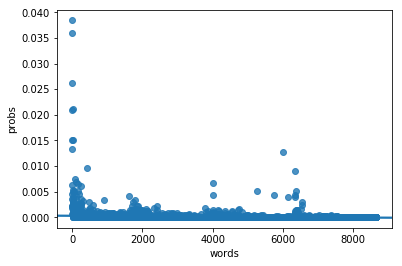

In [9]:

gm = sum([ v for k,v in giantmodel.items() ])    
probs = [ (float(v)/gm, k) for k,v in giantmodel.items() ]
probs = [ (p[0],p[1]) for p in probs if p[0] > 0.]
ents = {}
ent = 0
import math
for p in probs:
    if p[0] > 0.:
        ent -= p[0] * math.log(p[0], 2)
        ents[p[1]] = ent

#federate_frequencies =  []
yentropies = [ v['eofh'] for v in unravel ]
import numpy as np
print(np.mean(yentropies))
print(np.var(yentropies))
print(min(yentropies))
print(max(yentropies))
print(max([v for v in ents.values() ]))
print(min([v for v in ents.values() ]))

wns = [ x for x in range(0,len(ents)) ]
#plt.clf()
#plt.plot(wns,list(ents.values()))
#plt.title('Word entropy of unigram model frequency histogram')
#plt.xlabel('per word out of 14000 words')a
#plt.plot(wns,bing_entropies)
#plt.plot(wns,ddg_entropies)
#plt.show()

probs = [i[0] for i in probs]
import pandas as pd
d = {'words': wns, 'probs': probs}
df = pd.DataFrame(data=d)
ax = sns.regplot(x='words', y='probs', data=df)
plt.show()


In [10]:
stat_items = [ f['urlDat'] for f in unravel ] 

unravel[0]['urlDat'];
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
import numpy as np

rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

features = [ list(c['urlDat'].values())[0:-1] for c in crude_text ]
feature_labels = [ list(c['urlDat'].keys())[0:-1] for c in crude_text ]

#Examples

import numpy as np
#from sklearn.decomposition import NMF
#model = NMF(n_components=2, init='random', random_state=0)
#W = model.fit_transform(features)
#H = model.components_

#sklearn.decomposition.NMF(np.array(yy))


In [11]:
#gsc_text[:]['frequencies'][1]

153
8650


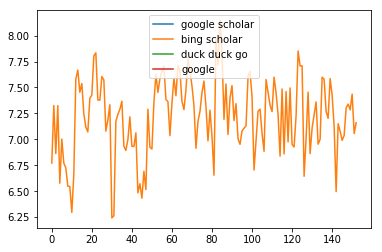

0 153 153


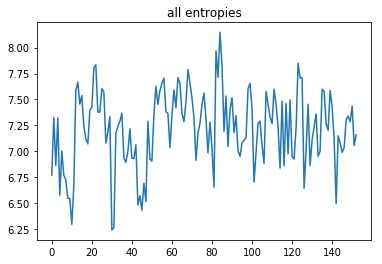

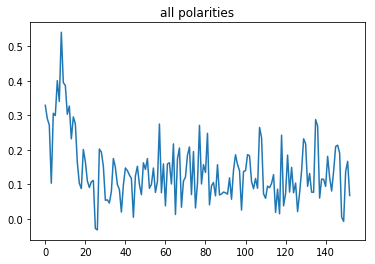

153
(153,)


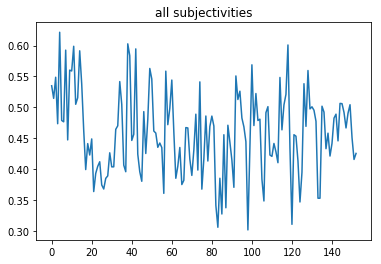

153
(153,)


In [12]:

#ax = sns.regplot(x='words', y='probs', data=df)


print(len(yentropies))
#print(len(word_names))
print(len(ents))

gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
ddg_text = list(filter(lambda x: x['urlDat']['se'] == 'duckduckgo_', crude_text))
bing_text = list(filter(lambda x: x['urlDat']['se'] == 'bing_', crude_text))
gword_names = [ c['urlDat']['keyword'] for c in gsc_text ]
#print(gword_names)
gsc_entropies = [e['eofh'] for e in gsc_text if e['urlDat']['se'] == 'gScholar_' ]
bing_entropies = [e['eofh'] for e in bing_text if e['urlDat']['se'] == 'bing_']
ddg_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'duckduckgo_'] 
#yahoo_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'yahoo_'] 
google_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'google_'] 

wns = [ x for x in range(0,len(gsc_text)) ]
plt.clf()
fig, ax = plt.subplots()

plt.plot([ x for x in range(0,len(gsc_entropies)) ],gsc_entropies,label='google scholar')
plt.plot([ x for x in range(0,len(bing_entropies)) ],bing_entropies,label='bing scholar')
plt.plot([ x for x in range(0,len(ddg_entropies)) ],ddg_entropies,label='duck duck go')
#plt.plot([ x for x in range(0,len(yahoo_entropies)) ],yahoo_entropies,label='yahoo')
plt.plot([ x for x in range(0,len(google_entropies)) ],google_entropies,label='google')
legend = ax.legend(loc='upper center')

plt.show()

print(len(ddg_text),len(crude_text),len(bing_text))


all_entropies = [e['eofh'] for e in crude_text ] 


all_entropies = [e['eofh'] for e in crude_text ] 
plt.clf()
plt.plot([i for i,j in enumerate(all_entropies)],all_entropies)
plt.title('all entropies')
plt.show()
all_polarities =[e['urlDat']['sp'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_polarities)],all_polarities)
plt.title('all polarities')
plt.show()
print(len(unravel))
print(np.shape(unravel))


all_subjectivities =[e['urlDat']['ss'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_subjectivities)],all_subjectivities)
plt.title('all subjectivities')
plt.show()


print(len(unravel))
print(np.shape(unravel))


In [13]:
'''
print(np.min(gsc_entropies))
print(gsc_entropies[0])
blah = np.min(gsc_entropies)
indexs = gsc_entropies[:] == blah
print(indexs)
'''

'\nprint(np.min(gsc_entropies))\nprint(gsc_entropies[0])\nblah = np.min(gsc_entropies)\nindexs = gsc_entropies[:] == blah\nprint(indexs)\n'

In [14]:

#print(X)
#Xs = [ j 
      
Xs = []
y = []    
for i in features:
    temp = []      
    for k,j in enumerate(i[:-2]):
        if type(j) is not type(str()):
            
            temp.append(j)
        elif y==3:
            y.append(j)
    Xs.append(temp)          
      
features = np.array(Xs)



print(len(Xs),len(yentropies))
target = yentropies
regressor = rfr.fit(features,target)
lm = lm.fit(features,yentropies)

print('linear model regression')
print(lm.score(features,yentropies))
print('random forest regression')
print(regressor.score(features,target))

regressor.verbose = 1
print(regressor)
from sklearn.linear_model import LinearRegression,Lasso

def scorer(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = est.predict(X).squeeze()
    actual = y.squeeze()
    if predicted.var()==0:
        r = 0
    else:
        r,p = pearsonr(predicted,actual)    
    return r



153 153
linear model regression
0.788660007134
random forest regression
0.96581521202
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False)


In [15]:
features[0]

array([  0.00000000e+00,   4.29000000e+02,   1.70000000e+01,
         0.00000000e+00,   3.28431373e-01,   5.34920635e-01,
         7.90000000e+00,   5.94000000e+01,   7.90000000e+00,
         1.50100000e+01,   1.15000000e+01,   1.71096503e+01,
         8.31000000e+00])

(153, 13)
PC 1 explains 98.1% of the variance
PC 2 explains 1.07% of the variance
PC 3 explains 0.53% of the variance
PC 4 explains 0.24% of the variance
PC 5 explains 0.0672% of the variance
PC 6 explains 0.00978% of the variance
PC 7 explains 0.00411% of the variance
PC 8 explains 0.00125% of the variance
PC 9 explains 0.000481% of the variance
PC 10 explains 1.61e-05% of the variance
PC 11 explains 7.63e-06% of the variance
PC 12 explains 6.82e-06% of the variance
PC 13 explains 2.39e-07% of the variance


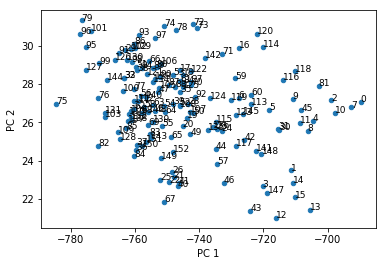

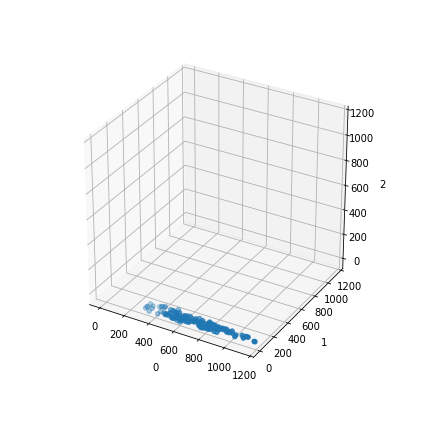

In [16]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
#!pip install ipyvolume
from mpl_toolkits.mplot3d import Axes3D
#import ipyvolume.pylab as p3

pca = PCA()
data = features
print(np.shape(features))
pca = PCA(n_components=13).fit(data)
data_rotated = np.dot(pca.components_,data.T).T


        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))
name='word_complexity'
#summarize(data_rotated,name)        
#report_mean_var(data_rotated)

def variance_explained(df,pca):
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    for i in range(n_components):
        print("PC %d explains %.3g%% of the variance" % (i+1,100*pca.explained_variance_ratio_[i]))

variance_explained(pd.DataFrame(data_rotated),pca)

reduced_dims = pca.components_#* data 
def annotate_scatter(ax,df_transformed,df):
    for i, txt in enumerate(df.index):
        x_loc = df_transformed['PC 1'].iloc[i]
        y_loc = df_transformed['PC 2'].iloc[i]
        ax.annotate(txt, (x_loc,y_loc), fontsize=9)
    #for i, text in enumerate(df.index):
    #    ax.text(df['PC 1'].iloc[i],df['PC 2'].iloc[i], text)
        
def plot_transformed_data(pca,df_transformed,df,figsize=None):
    plt.clf()
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    pca_df = pd.DataFrame(pca.transform(df.values),
                      index=df.index,
                      columns=['PC %d' % (i+1) for i in range(n_components)])
    ax = pca_df.plot.scatter('PC 1','PC 2',figsize=figsize)
    #ax = mds_df.plot.scatter(x='PC 1',y='PC 2',figsize=(12,12))
    #annotate_scatter(ax,mds_df)
    annotate_scatter(ax,pca_df,df_transformed)
    plt.show()
    

plot_transformed_data(pca,pd.DataFrame(data),pd.DataFrame(data_rotated))
        
def plot3d(df):
    plt.clf()
    data = df.values
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data[:,0:3].T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    ax.set_xlabel(df.columns[0],labelpad=10)
    ax.set_ylabel(df.columns[1],labelpad=10)
    ax.set_zlabel(df.columns[2],labelpad=10)
    ax.dist = 12
    plt.tight_layout()    
    plt.show()
plot3d(pd.DataFrame(data_rotated))   



In [17]:
print(reduced_dims[0])
print(reduced_dims[1])
print(data[0])

[ -4.18620330e-03   9.98787623e-01   2.62003479e-02   1.52275039e-02
  -8.77015808e-05  -8.64121866e-05  -4.99910592e-03   3.63710660e-02
  -1.80700720e-03  -8.64432668e-03  -6.91231316e-03  -3.44724172e-03
  -1.38210987e-03]
[-0.00858718 -0.03886761  0.06890568 -0.07718329  0.00226649  0.00114345
 -0.14120859  0.95847353 -0.06224358 -0.14789036 -0.13094506 -0.07430548
 -0.02605321]
[  0.00000000e+00   4.29000000e+02   1.70000000e+01   0.00000000e+00
   3.28431373e-01   5.34920635e-01   7.90000000e+00   5.94000000e+01
   7.90000000e+00   1.50100000e+01   1.15000000e+01   1.71096503e+01
   8.31000000e+00]


[1 0 1 2 3 0 3 1 3 3 1 3 2 2 2 2 1 0 0 0 0 2 2 0 0 2 2 3 3 1 0 0 3 3 1 1 0
 0 1 1 0 0 0 2 0 3 2 3 3 0 0 3 1 3 3 2 2 2 2 1 3 0 0 0 0 2 3 2 3 3 0 3 1 3
 3 3 3 3 3 3 1 1 2 0 2 2 0 0 3 0 0 0 3 0 1 1 1 1 1 1 0 1 3 0 0 3 3 3 3 0 0
 3 3 0 1 0 1 2 3 3 1 3 3 0 3 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 3 0 1 0 3 3 3 0
 0 0 0 0 0]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


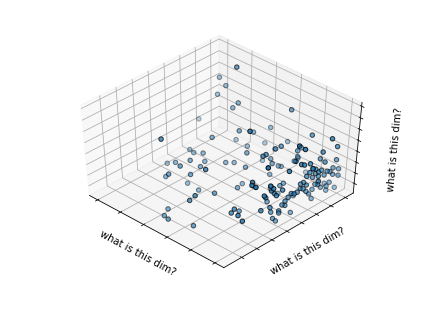

In [18]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=4)
#km.labels_
clustered = km.fit(features)
print(clustered.labels_)
print(clustered)

#plt.clf()
#plt.scatter(features,c=clustered.labels_)
#plt.xlabel('Voltage @ 0.9 ms')
#plt.ylabel('Voltage @ 1.5 ms');
#plt.show()
fignum = 1
#titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
#for name, est in estimators:
plt.clf()
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#est.fit(f)
#labels = est.labels_

ax.scatter(features[:, 3], features[:, 0], features[:, 2], edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('what is this dim?')
ax.set_ylabel('what is this dim?')
ax.set_zlabel('what is this dim?')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1
plt.show()


In [19]:
def my_dendrogram(features,color_threshold,truncate_mode=None,labels=None,no_labels=False,leaf_font_size=14):
    plt.figure(figsize=(17,7))
    Z = linkage(features,method='ward')
    Z[:,2] = Z[:,2]**0.25 # Warp distance for visualization purposes
    dendrogram(
        Z,
        truncate_mode=truncate_mode,  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        color_threshold=color_threshold,
        above_threshold_color='black',
        leaf_font_size=leaf_font_size,
        labels=labels,
        no_labels=no_labels,
    );
    plt.ylabel('Intercluster distance')
    if not no_labels:
        plt.xlabel('Cluster sizes');
    plt.show()    
#my_dendrogram(features,1.2,no_labels=True)        

In [20]:
bings = [ f for f in unravel if f['urlDat']['se'] =='bing_']
googles = [ f for f in unravel if f['urlDat']['se'] =='google_']
GMOs = [ f for f in unravel if f['urlDat']['keyword'] =='GMO']
GMO_standard = [ f['urlDat']['standard'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_pol = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_sent = [ f['urlDat']['ss'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 
gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
unravel[0]['urlDat']
gsc = list(filter(lambda x: x['se'] == 'gScholar_', stat_items))
scholar_wc = [ f['wcount'] for f in gsc ] 

In [21]:
print(scholar_wc)



[]


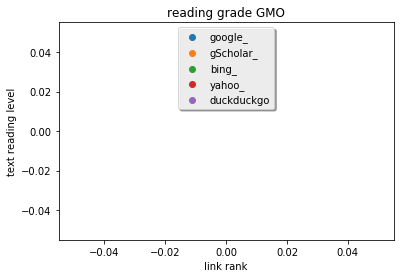

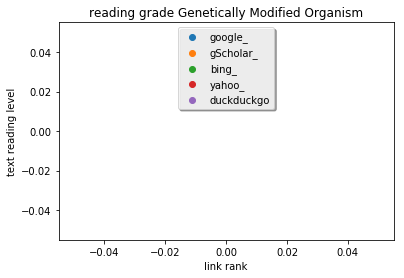

In [22]:
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'
se[4] = 'duckduckgo'

ses = list(se.values())
#search_query = str('Vaccine')
searchList = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Play Dough', 'Neutron']
xx = []
yy = []
for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    for i,v in enumerate(ses):
        #print(i,v)
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        x.append(rank)
        y.append(complexity)
    #if len(xx)!= 0 and len(yy) !=0:
    xx.append(x)
    yy.append(y)
    #print(len(complexity),len(rank))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'GMO')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][0],yy[0][0],label=ses[0])
plt.scatter(xx[1][0],yy[1][0],label=ses[1])
plt.scatter(xx[2][0],yy[2][0],label=ses[2])
plt.scatter(xx[3][0],yy[3][0],label=ses[3])
plt.scatter(xx[4][0],yy[4][0],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()
#plt.savefig('rank_versus_complexity_{0}.png'.format(search_query))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'Genetically Modified Organism')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][1],yy[0][1],label=ses[0])
plt.scatter(xx[1][1],yy[1][1],label=ses[1])
plt.scatter(xx[2][1],yy[2][1],label=ses[2])
plt.scatter(xx[3][1],yy[3][1],label=ses[3])
plt.scatter(xx[4][1],yy[4][1],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()



/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


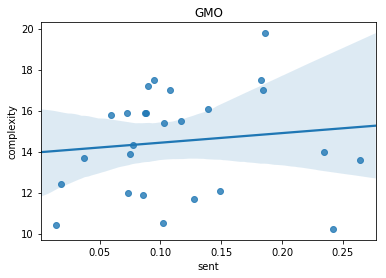

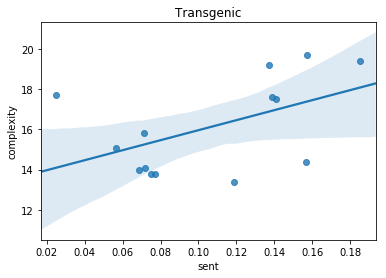

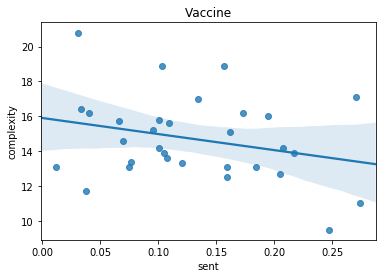

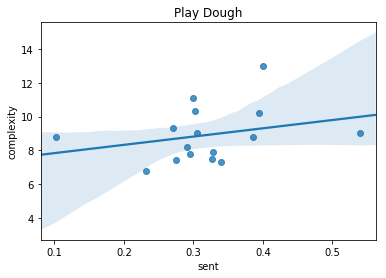

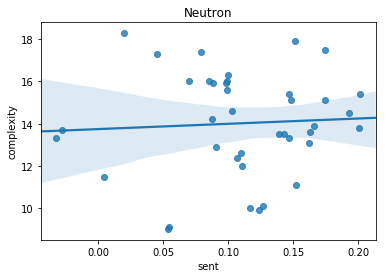

In [37]:
# 2.       Pro/anti/neutral vs. text complexity#

import seaborn as sns
import pandas as pd
#plt.savefig(str('weight_')+str(k)+'cvs_regexp_'+str(mcv)+'.png');
#plt.close()
import statsmodels.api as sm
for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query ]
    sent = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] ==search_query ]

    if len(complexity)>0 and len(sent)>0:
        df = pd.DataFrame({'complexity': complexity,
         'sent': sent})
        plt.figure()
        plt.title(str(search_query))
        ax = sns.regplot(x="sent",y="complexity", data=df)
        
    



legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))

plt.show()


In [ ]:
# 3.       GMO/transgenics vs. text complexity

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'
se[4] = 'duckduckgo_'

ses = list(se.values())
#search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
ee=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    e = []
    for i,v in enumerate(ses):
        comp = sum([ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v ])

        entropy = sum([ f['eofh'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v  ])
        #if len(complexity)>0:
         #   comp = float(complexity[0])
        #else:
        #    comp = 0
        xx.append(i)
        y.append(comp)
        e.append(entropy)
    yy.append(y)
    ee.append(e)
    
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(ses)]
offset = [(i+width) for i,v in enumerate(ses)]
rects1 = ax.bar(ind,yy[0],width, color='r')# yerr=men_std)
rects2 = ax.bar(ind, yy[1], width, color='y')#, yerr=women_std)
# add some text for labels, title and axes ticks
ax.set_ylabel('Complexity')
ax.set_title('Readability by search query and Search Engine')
ax.set_xticks(offset)
ax.set_xticklabels((se[0], se[1], se[2], se[3],se[4]))#, 'G5'))

ax.legend((rects1[0], rects2[0]), ('GMO', 'Transgenic'))
plt.show()


plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(ses)]
offset = [(i+width) for i,v in enumerate(ses)]
rects1 = ax.bar(ind,ee[0],width, color='r')# yerr=men_std)
rects2 = ax.bar(ind, ee[1], width, color='y')#, yerr=women_std)
ax.set_ylabel('Complexity')
ax.set_title('Entropy by search query and Search Engine')
ax.set_xticks(offset)
ax.set_xticklabels((se[0], se[1], se[2], se[3],se[4]))#, 'G5'))

ax.legend((rects1[0], rects2[0]), ('GMO', 'Transgenic'))
plt.show()
#plt.savefig('GMO_Transgenic_complexity_{0}{1}.png'.format(search_query[0],search_query[1]))
import numpy as np
print(yy)
print(ee)

In [ ]:

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'

ses = list(se.values())
search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    for i,v in enumerate(ses):
        comp = sum([ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v ])
        sent = sum([ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] == sq and f['urlDat']['se'] == v ])

        xx.append(i)
        y.append((comp,sent))    
    yy.append(y)
#print(len(complexity),len(rank))
#fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
#width = 0.35       # the width of the bars
#plt.clf()
#fig, ax = plt.subplots()

#f, axarr = plt.subplots(1, sharex=True)
ind = [i for i,v in enumerate(ses)]
offset = [(i+width)/2.0 for i,v in enumerate(ses)]


fig.clf()
fig, ax = plt.subplots()
plt.title(str('sentiment '))#+search_query)
plt.ylabel('text reading level')
plt.xlabel('sentiment polarity')
#lineObjects = 
sentt0 = [sent[1] for sent in yy[0] ]
complexity0 = [comp[0] for comp in yy[0] ]
plt.scatter(sentt0,complexity0,label='GMO')
sentt1 = [sent[1] for sent in yy[1] ]
complexity1 = [sent[0] for sent in yy[0] ]
plt.scatter(sentt1,complexity1,label='Transgenic')


legend = ax.legend(loc='upper center', shadow=True)
plt.show()
